---
title: "Correlation in a nutshell"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-07"
categories: [python, datacamp, statistics, correlation]
image: "relatioship direction.jpg"

---

# Correlation in a nutshell

In this article we will explore basically a linear relationship between two variables, its possible quantification (magnitude & direction). We will also touch high level of confounding & caveats of correlation. This article use exploration of study for mammals sleeping habits & world happiness

This is my learning experience of data science through DataCamp

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory analysis of mammals data & their sleeping habits

In [2]:
df = pd.read_csv('mammals.csv')
df.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       62 non-null     object 
 1   body_wt       62 non-null     float64
 2   brain_wt      62 non-null     float64
 3   non_dreaming  48 non-null     float64
 4   dreaming      50 non-null     float64
 5   total_sleep   58 non-null     float64
 6   life_span     58 non-null     float64
 7   gestation     58 non-null     float64
 8   predation     62 non-null     int64  
 9   exposure      62 non-null     int64  
 10  danger        62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


## Metadata excerpt analysis

The sleep time of 39 species of mammals distributed over 13 orders is analyzed in regards to their distribution over the 13 orders. There are 62 observations across 11 variables.

species : Mammal species

body_wt : Mammal's total body weight (kg)

brain_wt : Mammal's brain weight (kg)

non_dreaming : Sleep hours without dreaming

dreaming : Sleep hours spent dreaming

total_sleep : Total number of hours of sleep

life_span : Life span (in years)

gestation : Days during gestation / pregnancy

The likelihood that a mammal will be preyed upon. 1 = least likely to be preyed on. 5 = most likely to be preyed upon.

exposure : How exposed a mammal is during sleep. 1 = least exposed (e.g., sleeps in a well-protected den). 5 = most exposed.

A measure of how much danger the mammal faces. This index is based upon Predation and Exposure. 1 = least danger from other animals. 5 = most danger from other animals.

In [4]:
df.isnull().sum()

species          0
body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64

## Exploring visually (Body Weight)

<AxesSubplot:title={'center':'Mammals Body Weight Distribution'}, xlabel='body_wt', ylabel='Count'>

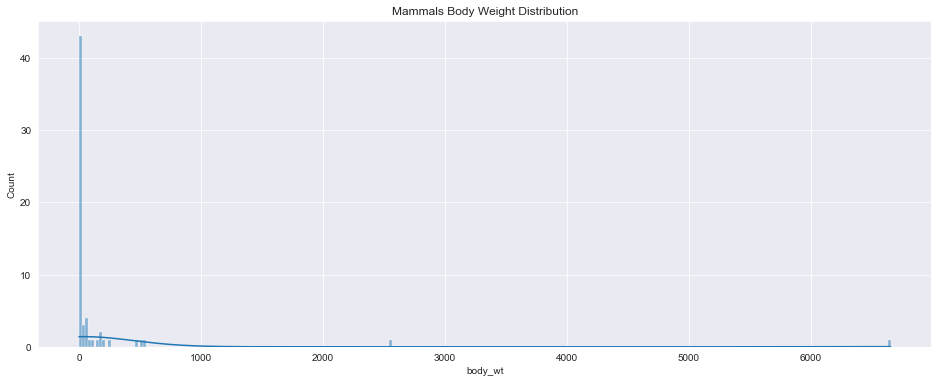

In [5]:
plt.figure(figsize=(16,6))
plt.title('Mammals Body Weight Distribution')
sns.histplot(df['body_wt'] , kde=True)

<AxesSubplot:title={'center':'Top 10 Mammals Body Wight'}, xlabel='body_wt', ylabel='species'>

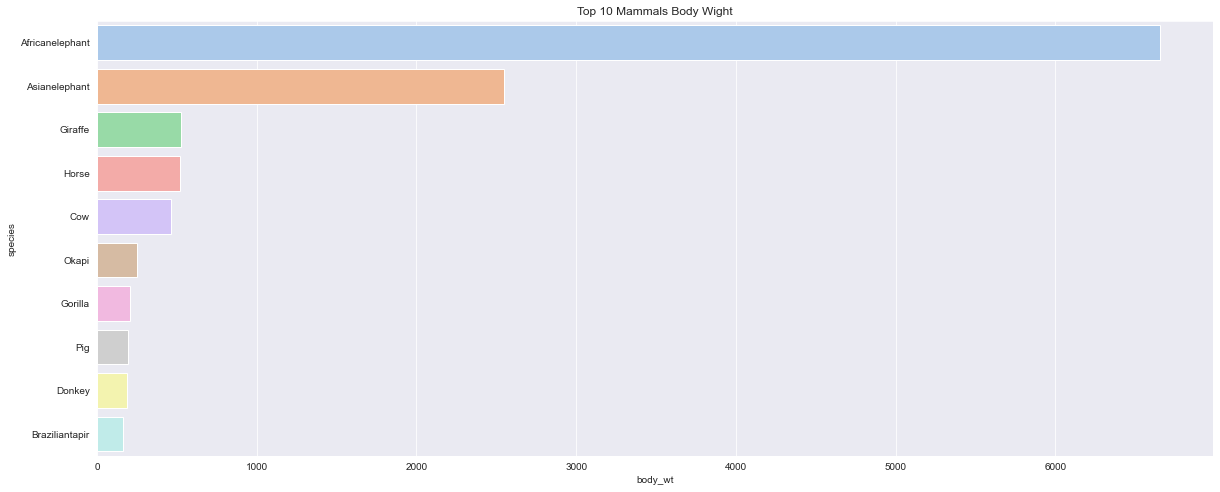

In [6]:
plt.figure(figsize=(20,8))
plt.title('Top 10 Mammals Body Wight')
sns.barplot(x='body_wt', y='species', data=df.sort_values('body_wt',ascending = False)[:10], palette='pastel')

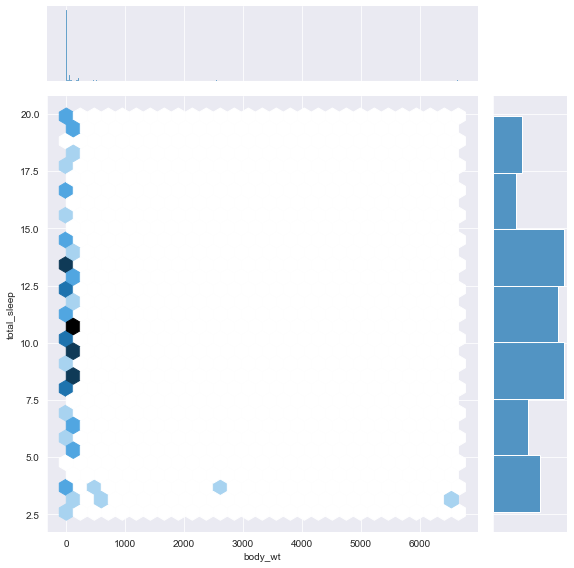

In [7]:
sns.jointplot(data=df, x="body_wt", y="total_sleep", kind="hex",  height=8)

## Brain weight visualization

<AxesSubplot:title={'center':'Mammals Brain Weight Distribution'}, xlabel='brain_wt', ylabel='Count'>

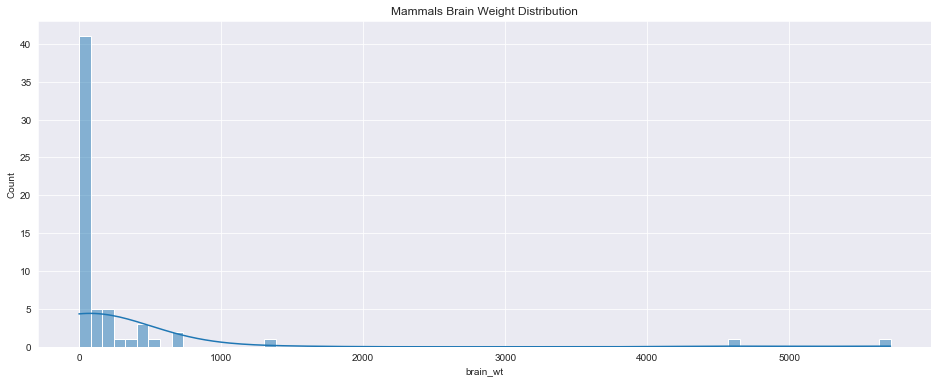

In [8]:
plt.figure(figsize=(16,6))
plt.title('Mammals Brain Weight Distribution')
sns.histplot(df['brain_wt'] , kde=True)

<AxesSubplot:title={'center':'Top 10 Mammals Brain Wight'}, xlabel='brain_wt', ylabel='species'>

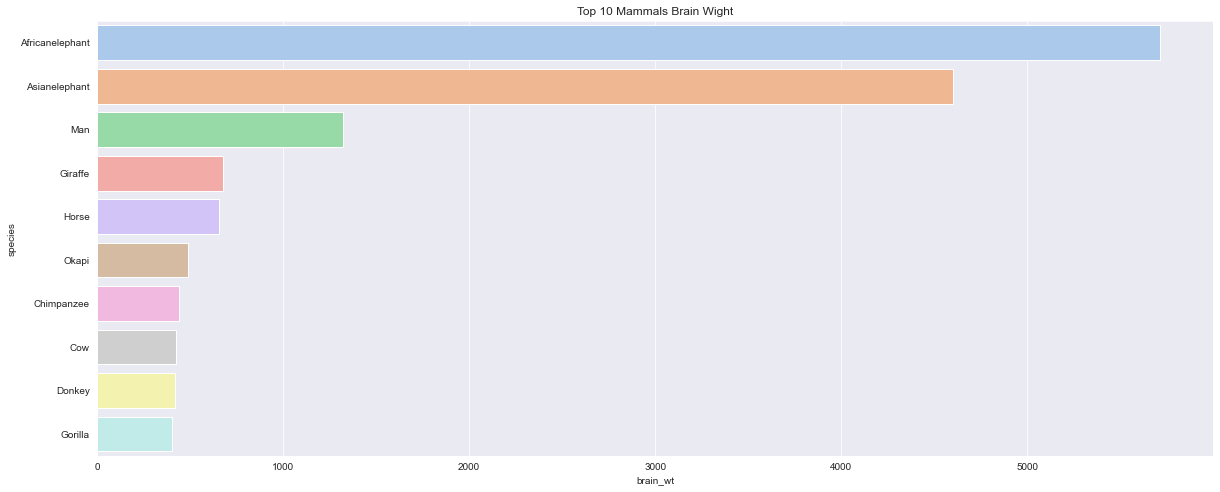

In [9]:
plt.figure(figsize=(20,8))
plt.title('Top 10 Mammals Brain Wight')
sns.barplot(x='brain_wt', y='species', data=df.sort_values('brain_wt',ascending = False)[:10], palette='pastel')

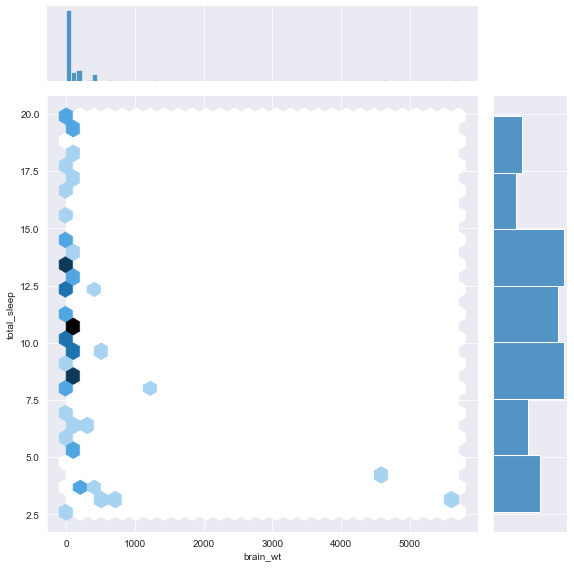

In [10]:
sns.jointplot(data=df, x="brain_wt", y="total_sleep", kind="hex",  height=8)

## Life span

<AxesSubplot:title={'center':'Mammals Life Span Distribution'}, xlabel='life_span', ylabel='Count'>

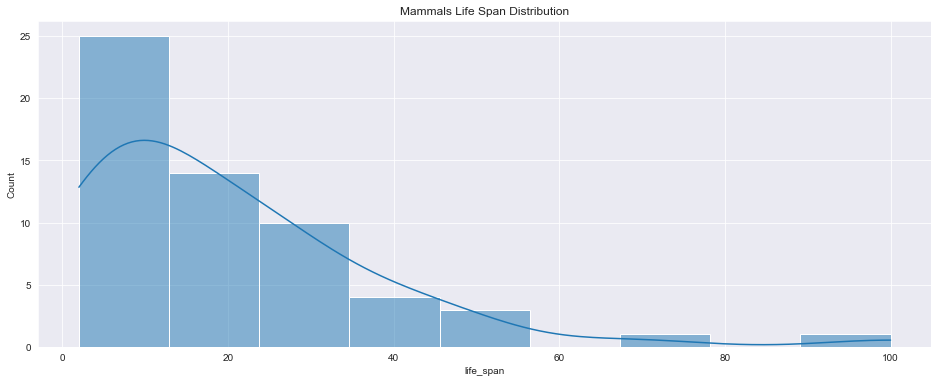

In [11]:
plt.figure(figsize=(16,6))
plt.title('Mammals Life Span Distribution')
sns.histplot(df['life_span'] , kde=True)

<AxesSubplot:title={'center':'Top 10 Mammals Life Span'}, xlabel='life_span', ylabel='species'>

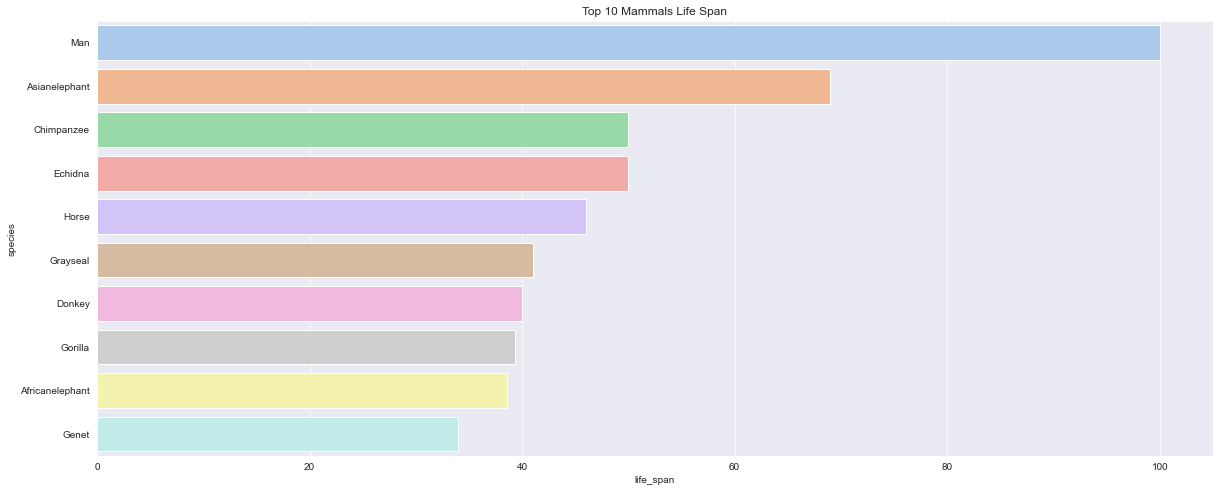

In [12]:
plt.figure(figsize=(20,8))
plt.title('Top 10 Mammals Life Span')
sns.barplot(x='life_span', y='species', data=df.sort_values('life_span',ascending = False)[:10], palette='pastel')

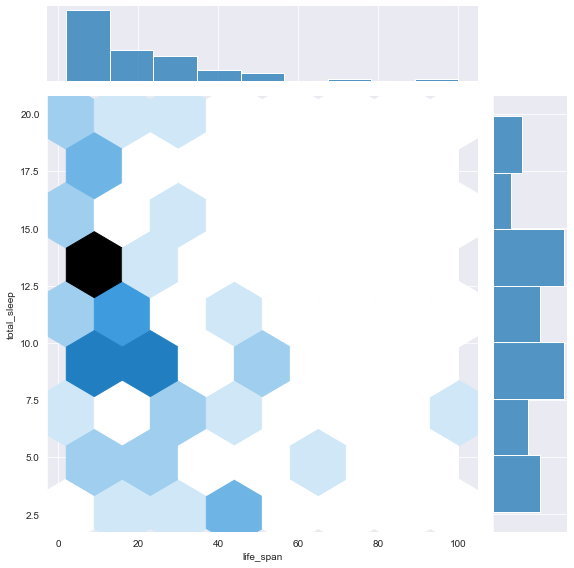

In [13]:
sns.jointplot(data=df, x="life_span", y="total_sleep", kind="hex",  height=8)

## Predation

C:\Users\dghr201\AppData\Local\Temp\ipykernel_42120\3907231976.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="predation", y="total_sleep", data=df,jitter=True, palette='pastel', ax=axes[1][1])


<AxesSubplot:xlabel='predation', ylabel='total_sleep'>

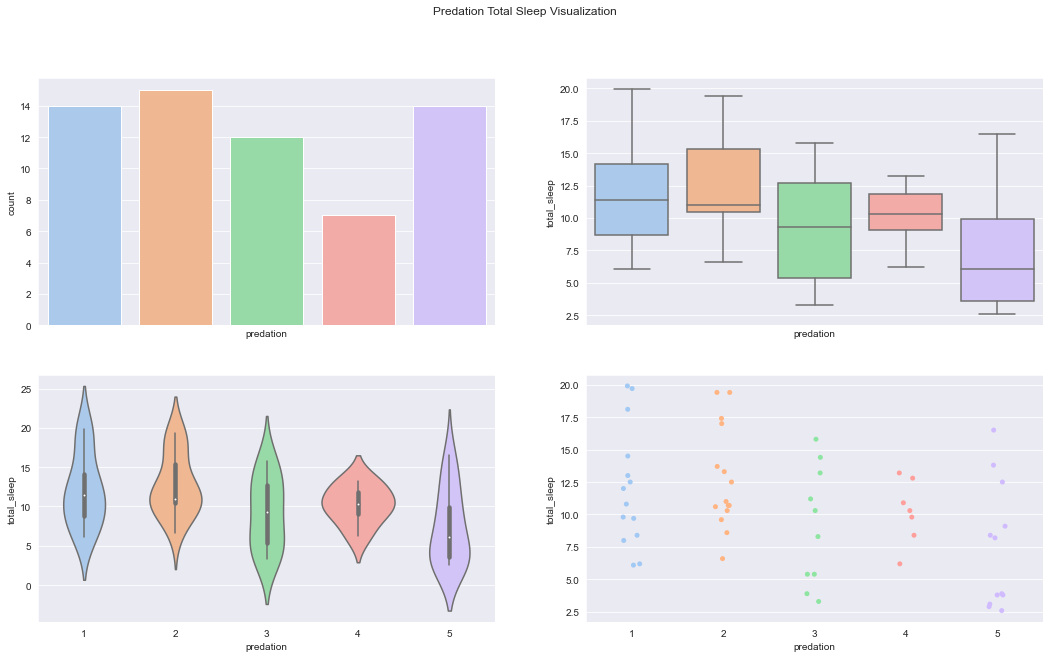

In [14]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Predation Total Sleep Visualization')
sns.countplot(x='predation',data=df,palette='pastel', ax=axes[0][0])
sns.boxplot(x="predation", y="total_sleep", data=df, palette='pastel', ax=axes[0][1])
sns.violinplot(x="predation", y="total_sleep", data=df, palette='pastel', ax=axes[1][0])
sns.stripplot(x="predation", y="total_sleep", data=df,jitter=True, palette='pastel', ax=axes[1][1])

## Exposure to get attacked

C:\Users\dghr201\AppData\Local\Temp\ipykernel_42120\3542283944.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="exposure", y="total_sleep", data=df,jitter=True, palette='pastel', ax=axes[1][1])


<AxesSubplot:xlabel='exposure', ylabel='total_sleep'>

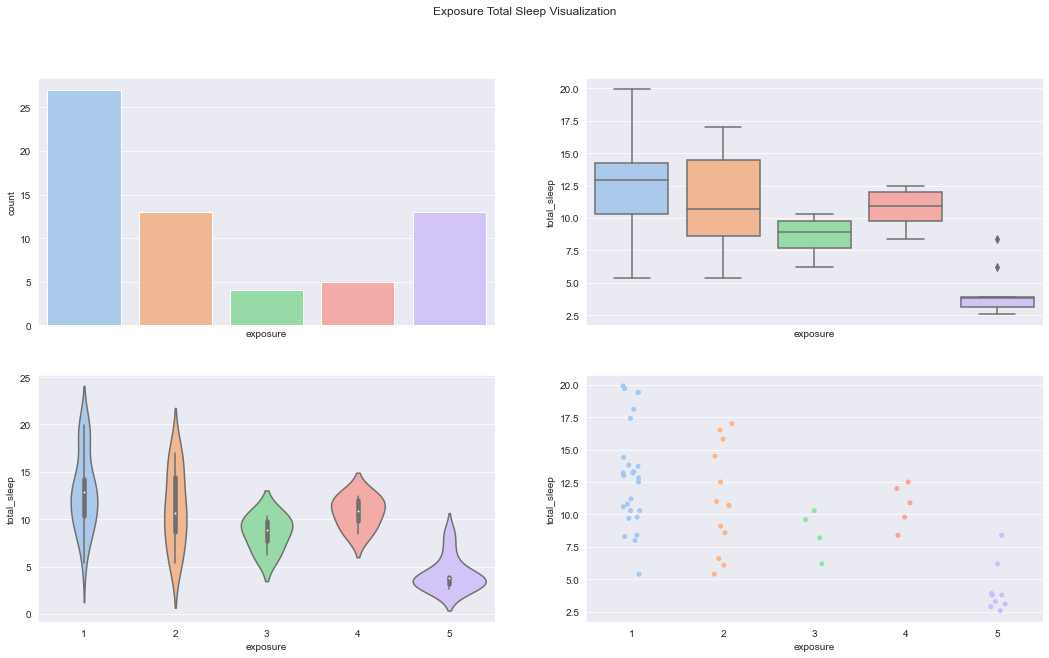

In [15]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Exposure Total Sleep Visualization')
sns.countplot(x='exposure',data=df,palette='pastel', ax=axes[0][0])
sns.boxplot(x="exposure", y="total_sleep", data=df, palette='pastel', ax=axes[0][1])
sns.violinplot(x="exposure", y="total_sleep", data=df, palette='pastel', ax=axes[1][0])
sns.stripplot(x="exposure", y="total_sleep", data=df,jitter=True, palette='pastel', ax=axes[1][1])

## Danger been seen & prayed

C:\Users\dghr201\AppData\Local\Temp\ipykernel_42120\3554697531.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="danger", y="total_sleep", data=df,jitter=True, palette='pastel', ax=axes[1][1])


<AxesSubplot:xlabel='danger', ylabel='total_sleep'>

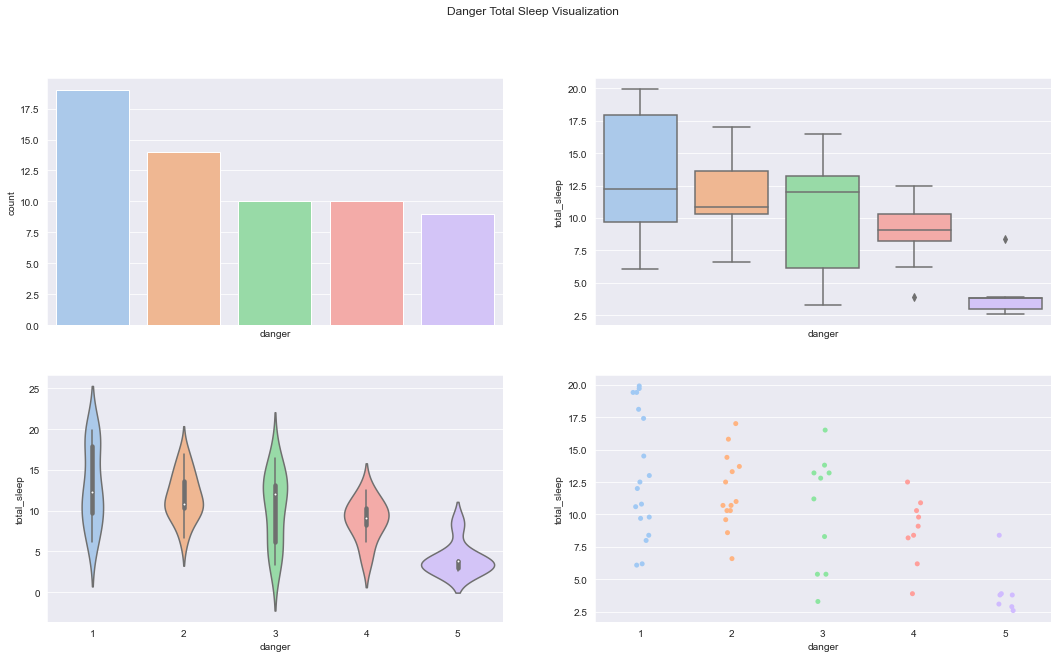

In [16]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Danger Total Sleep Visualization')
sns.countplot(x='danger',data=df,palette='pastel', ax=axes[0][0])
sns.boxplot(x="danger", y="total_sleep", data=df, palette='pastel', ax=axes[0][1])
sns.violinplot(x="danger", y="total_sleep", data=df, palette='pastel', ax=axes[1][0])
sns.stripplot(x="danger", y="total_sleep", data=df,jitter=True, palette='pastel', ax=axes[1][1])

## Relationship b/w two variables

x = explanatory / independent variables
y = response / dependent variable

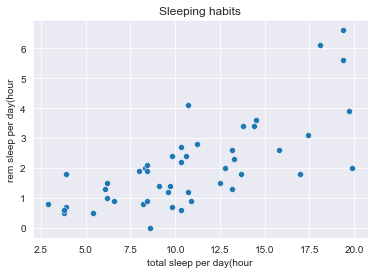

In [20]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='total_sleep', y='dreaming',data=df)

# Show plot
plt.title('Sleeping habits')
plt.ylabel("rem sleep per day(hour")
plt.xlabel("total sleep per day(hour")
plt.show()

## adding trend line

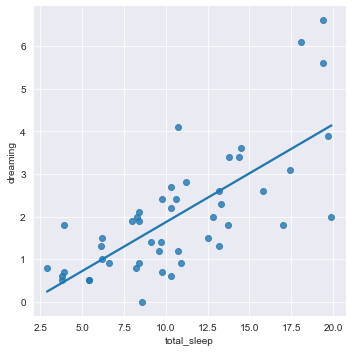

In [22]:
sns.lmplot(x="total_sleep", y="dreaming", data=df, ci=None)
plt.show()

## computing correlation

In [23]:
df['total_sleep'].corr(df['dreaming'])

0.7270869571641637

In [24]:
df['dreaming'].corr(df['total_sleep'])

0.7270869571641637

## Quantification (magnitude & direction) of correlation

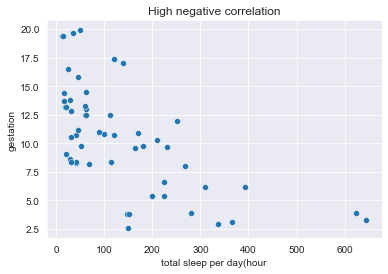

In [26]:
# Create a scatterplot of gestation vs. total_sleep and show
sns.scatterplot(x='gestation', y='total_sleep',data=df)

# Show plot
plt.title('High negative correlation')
plt.ylabel("gestation")
plt.xlabel("total sleep per day(hour")
plt.show()

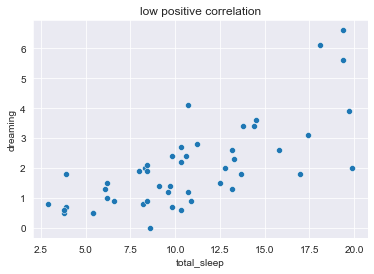

In [29]:
sns.scatterplot(x='total_sleep', y='dreaming',data=df)
plt.title("low positive correlation")
plt.show()